In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import plasmapy
from scipy import special as sp
from scipy import integrate
import numba as nb
import math
%config InlineBackend.figure_format = 'svg'

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

# Solving $f_t$ by BGK integral method

In [4]:
T = 1
L = 100

# kappa=10
u = 0.1
# theta = np.sqrt(2.0-3.0/kappa)
theta = np.sqrt(2.0)

In [5]:
@nb.jit
def fu1(v,phi):
    return np.exp(-(-(v**2-2*phi)**0.5+u)**2/2) 
@nb.jit
def fu2(v,phi):
    return np.exp(-( (v**2-2*phi)**0.5+u)**2/2) 
    
def nu_fun_nonvec(phi):
    fac = 1.0/np.sqrt(2*np.pi)
    r1 = integrate.quad(lambda v:fu1(v,phi),-np.inf,-np.sqrt(2*phi))[0]
    r2 = integrate.quad(lambda v:fu2(v,phi),np.sqrt(2*phi),np.inf)[0]
    return fac*(r1+r2)
nu_fun = np.vectorize(nu_fun_nonvec)

In [6]:
def ft_nonvec(w):
    r = 0.0
    if np.abs(w)<1e-6:
        r = np.exp(-u**2/2)/np.sqrt(2*np.pi)
    else:
        phi_list = np.linspace(0,-w,num=100000)
        
        #sech2
#         n_list = 1+(4*phi_list - 6*phi_list**2/psi)/delta**2
        #sech4
#         n_list = 1+(16*phi_list - 20*phi_list**1.5/psi**0.5)/delta**2
        #exp
        phi_list_add = phi_list
        phi_list_add[phi_list_add<1e-10] = 1e-10
        n_list = 1-(4*phi_list*np.log(phi_list_add/psi) + 2*phi_list)/delta**2
        
        nt_list = n_list - nu_fun(phi_list) 
        phi2_list = (phi_list[1:]+phi_list[0:-1])*0.5
        integrad = (nt_list[1:]-nt_list[0:-1])/np.sqrt(-w-phi2_list)
        r = integrad.sum()/np.pi/np.sqrt(2)
    return r
ft = np.vectorize(ft_nonvec)

In [8]:
%%time
delta = 10
# psi = 0.1

psi = 0.001
# delta = 10
vt_max = np.sqrt(2*psi)
vt = np.linspace(-vt_max,vt_max,num=100)
w_list = vt**2/2 - psi
ft_list = ft(w_list)

psi = 0.01
# delta = 30
vt_max1 = np.sqrt(2*psi)
vt1 = np.linspace(-vt_max1,vt_max1,num=100)
w_list1 = vt1**2/2 - psi
ft_list1 = ft(w_list1)

psi = 0.1
# delta = 50
vt_max2 = np.sqrt(2*psi)
vt2 = np.linspace(-vt_max2,vt_max2,num=100)
w_list2 = vt2**2/2 - psi
ft_list2 = ft(w_list2)

Wall time: 1h 25min 14s


In [42]:
vu1 = np.linspace(-1, -vt_max,num=200)
vu2 = np.linspace(vt_max, 1  ,num=200)
w1 = vu1**2-2*psi
w2 = vu2**2-2*psi
w1[w1<0]=0
w2[w2<0]=0
fu1_list = np.exp(-(-w1**0.5+u)**2/2)/np.sqrt(2*np.pi) 
fu2_list = np.exp(-( w2**0.5+u)**2/2)/np.sqrt(2*np.pi) 
v_non_phi = np.linspace(-3,3,num=200)
f_non_phi = np.exp(-(v_non_phi+u)**2/2)/np.sqrt(2*np.pi) 

In [43]:
# ft_list = np.loadtxt('./integral_method/sech4/ft4_d10')
# ft_list1 = np.loadtxt('./integral_method/sech4/ft4_d20')
# ft_list2 = np.loadtxt('./integral_method/sech4/ft4_d30')

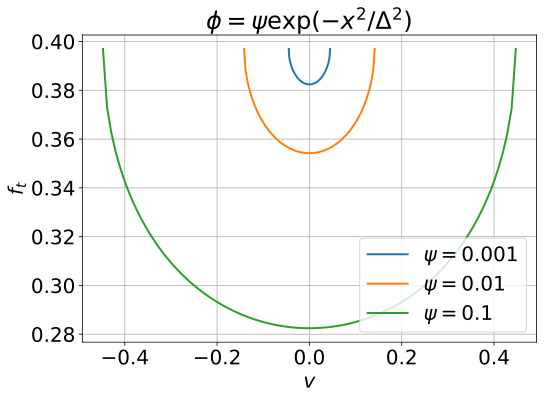

In [13]:
fig = plt.figure(figsize=(8,6))
plt.plot(vt,ft_list,'-'  ,label=r'$\psi =0.001$')
plt.plot(vt1,ft_list1,'-',label=r'$\psi =0.01$')
plt.plot(vt2,ft_list2,'-',label=r'$\psi =0.1$')
# plt.plot(vu1,fu1_list,color='orange')
# plt.plot(vu2,fu2_list,color='orange',label=r'$f_u$')
# plt.plot(v_non_phi,f_non_phi,'--',color='black',label=r'$f_{M}$')
plt.ylabel(r'$f_t$')
plt.xlabel(r'$v$')
plt.legend(loc=4)
plt.grid()
plt.title(r'$\phi=\psi \exp(-x^2/\Delta^2)$')
plt.tight_layout()
# plt.savefig('./integral_method/fte_p_u01d10.jpg',dpi=600)
plt.show()

In [154]:
# np.savetxt('./integral_method/ft2_p0001',ft_list)
# np.savetxt('./integral_method/ft2_p001',ft_list1)
# np.savetxt('./integral_method/ft2_p01',ft_list2)